In [7]:
import tensorflow as tf
# tf.enable_eager_execution() -- if tensorflow version is 1.xxx
# pip install -q tensorflow-datasets
import tensorflow_datasets as tfds 
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

W0825 13:25:36.395443 4759307712 deprecation.py:323] From /anaconda3/envs/py3/lib/python3.7/site-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/gaurav/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


W0825 13:27:55.017138 4759307712 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [6]:
sample_string = "Tensorflow, from basic to mastery"
tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('Original String is {}'.format(original_string))

NameError: name 'tokenizer' is not defined

In [8]:
train_data, test_data = imdb['train'], imdb['test']

In [10]:
tokenizer = info.features['text'].encoder
# print(tokenizer.subwords)

In [12]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [14]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [15]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [16]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

Epoch 1/10


W0825 13:33:00.464740 4759307712 deprecation.py:323] From /anaconda3/envs/py3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 585s 23ms/step - loss: 0.6853 - accuracy: 0.5330 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 258s 10ms/step - loss: 0.6831 - accuracy: 0.5359 - val_loss: 0.6840 - val_accuracy: 0.5347
Epoch 3/10
25000/25000 [==============================] - 276s 11ms/step - loss: 0.6826 - accuracy: 0.5375 - val_loss: 0.6838 - val_accuracy: 0.5373
Epoch 4/10
25000/25000 [==============================] - 254s 10ms/step - loss: 0.6821 - accuracy: 0.5422 - val_loss: 0.6838 - val_accuracy: 0.5384
Epoch 5/10
25000/25000 [==============================] - 245s 10ms/step - loss: 0.6817 - accuracy: 0.5443 - val_loss: 0.6841 - val_accuracy: 0.5385
Epoch 6/10
25000/25000 [==============================] - 236s 9ms/step - loss: 0.6813 - accuracy: 0.5449 - val_loss: 0.6843 - val_accuracy: 0.5383
Epoch 7/10
25000/25000 [==============================] - 231s 9ms/step - loss: 0.6811 - accuracy: 0.5462 - va

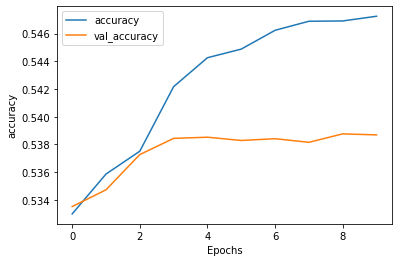

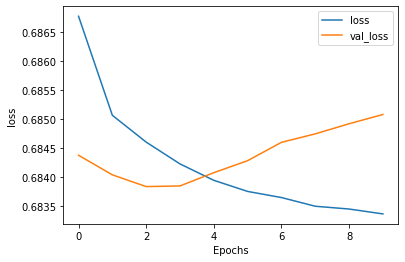

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [23]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs_subwords8k.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_subwords8k.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()


(8185, 64)


In [24]:
embeddings

array([-0.00050141,  0.03343222,  0.01524898, -0.00732567,  0.04974664,
        0.00127779,  0.02006142, -0.02520231, -0.00510762, -0.00659739,
        0.03044151,  0.02321521, -0.04033637,  0.01066454,  0.04898881,
        0.04962847,  0.00486428,  0.03622956,  0.03222957,  0.01582051,
       -0.03732646,  0.03399005,  0.00794382,  0.00336877,  0.01371511,
       -0.04028908,  0.01165079, -0.0319744 ,  0.04468345, -0.00237334,
        0.01372354, -0.0001117 ,  0.01029217,  0.02237816, -0.01976502,
       -0.01272202, -0.00587619, -0.03829111, -0.00821426,  0.01894815,
       -0.00521871, -0.03174865,  0.02649981,  0.02889832,  0.01899606,
       -0.01705674,  0.0232274 ,  0.01627744,  0.02460318,  0.00511248,
       -0.02280257,  0.04934584, -0.0334176 , -0.02500048, -0.02157886,
       -0.03913963, -0.0355948 , -0.01978242,  0.02367801,  0.00927275,
       -0.0100405 ,  0.0161068 , -0.04741076,  0.04018784], dtype=float32)